In [1]:
import pandas as pd
import numpy as np
import describe as tatl
import wrangle as get
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# feature selection imports
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

# import scaling methods
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, QuantileTransformer
# import modeling methods
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, mutual_info_score

from mitosheet import *
import plotly.express as px
# import to remove warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df, train, validate, test = get.wrangle_df()

Dataframe Input received: Splitting Data .5/.3/.2.
Train: (150, 23), Validate (90, 23), and Test (60, 23) are ready.    
 Proceed with EDA.


In [7]:
def plot_variable_pairs(train, cols, hue=None):
    '''
    This function takes in a df, a list of cols to plot, and default hue=None 
    and displays a pairplot with a red regression line.
    '''
    plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.7}}
    sns.pairplot(train[cols], hue=hue, kind="reg",plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})
    plt.show()

In [5]:
train.columns

Index(['country', 'cgdpe', 'ctfp', 'cwtfp', 'rtfpna', 'rwtfpna', 'labsh',
       'irr', 'delta', 'pl_con', 'pl_da', 'pl_gdpo', 'csh_c', 'csh_i', 'csh_g',
       'csh_r', 'pl_c', 'pl_g', 'pl_x', 'pl_k', 'both_sexes'],
      dtype='object')

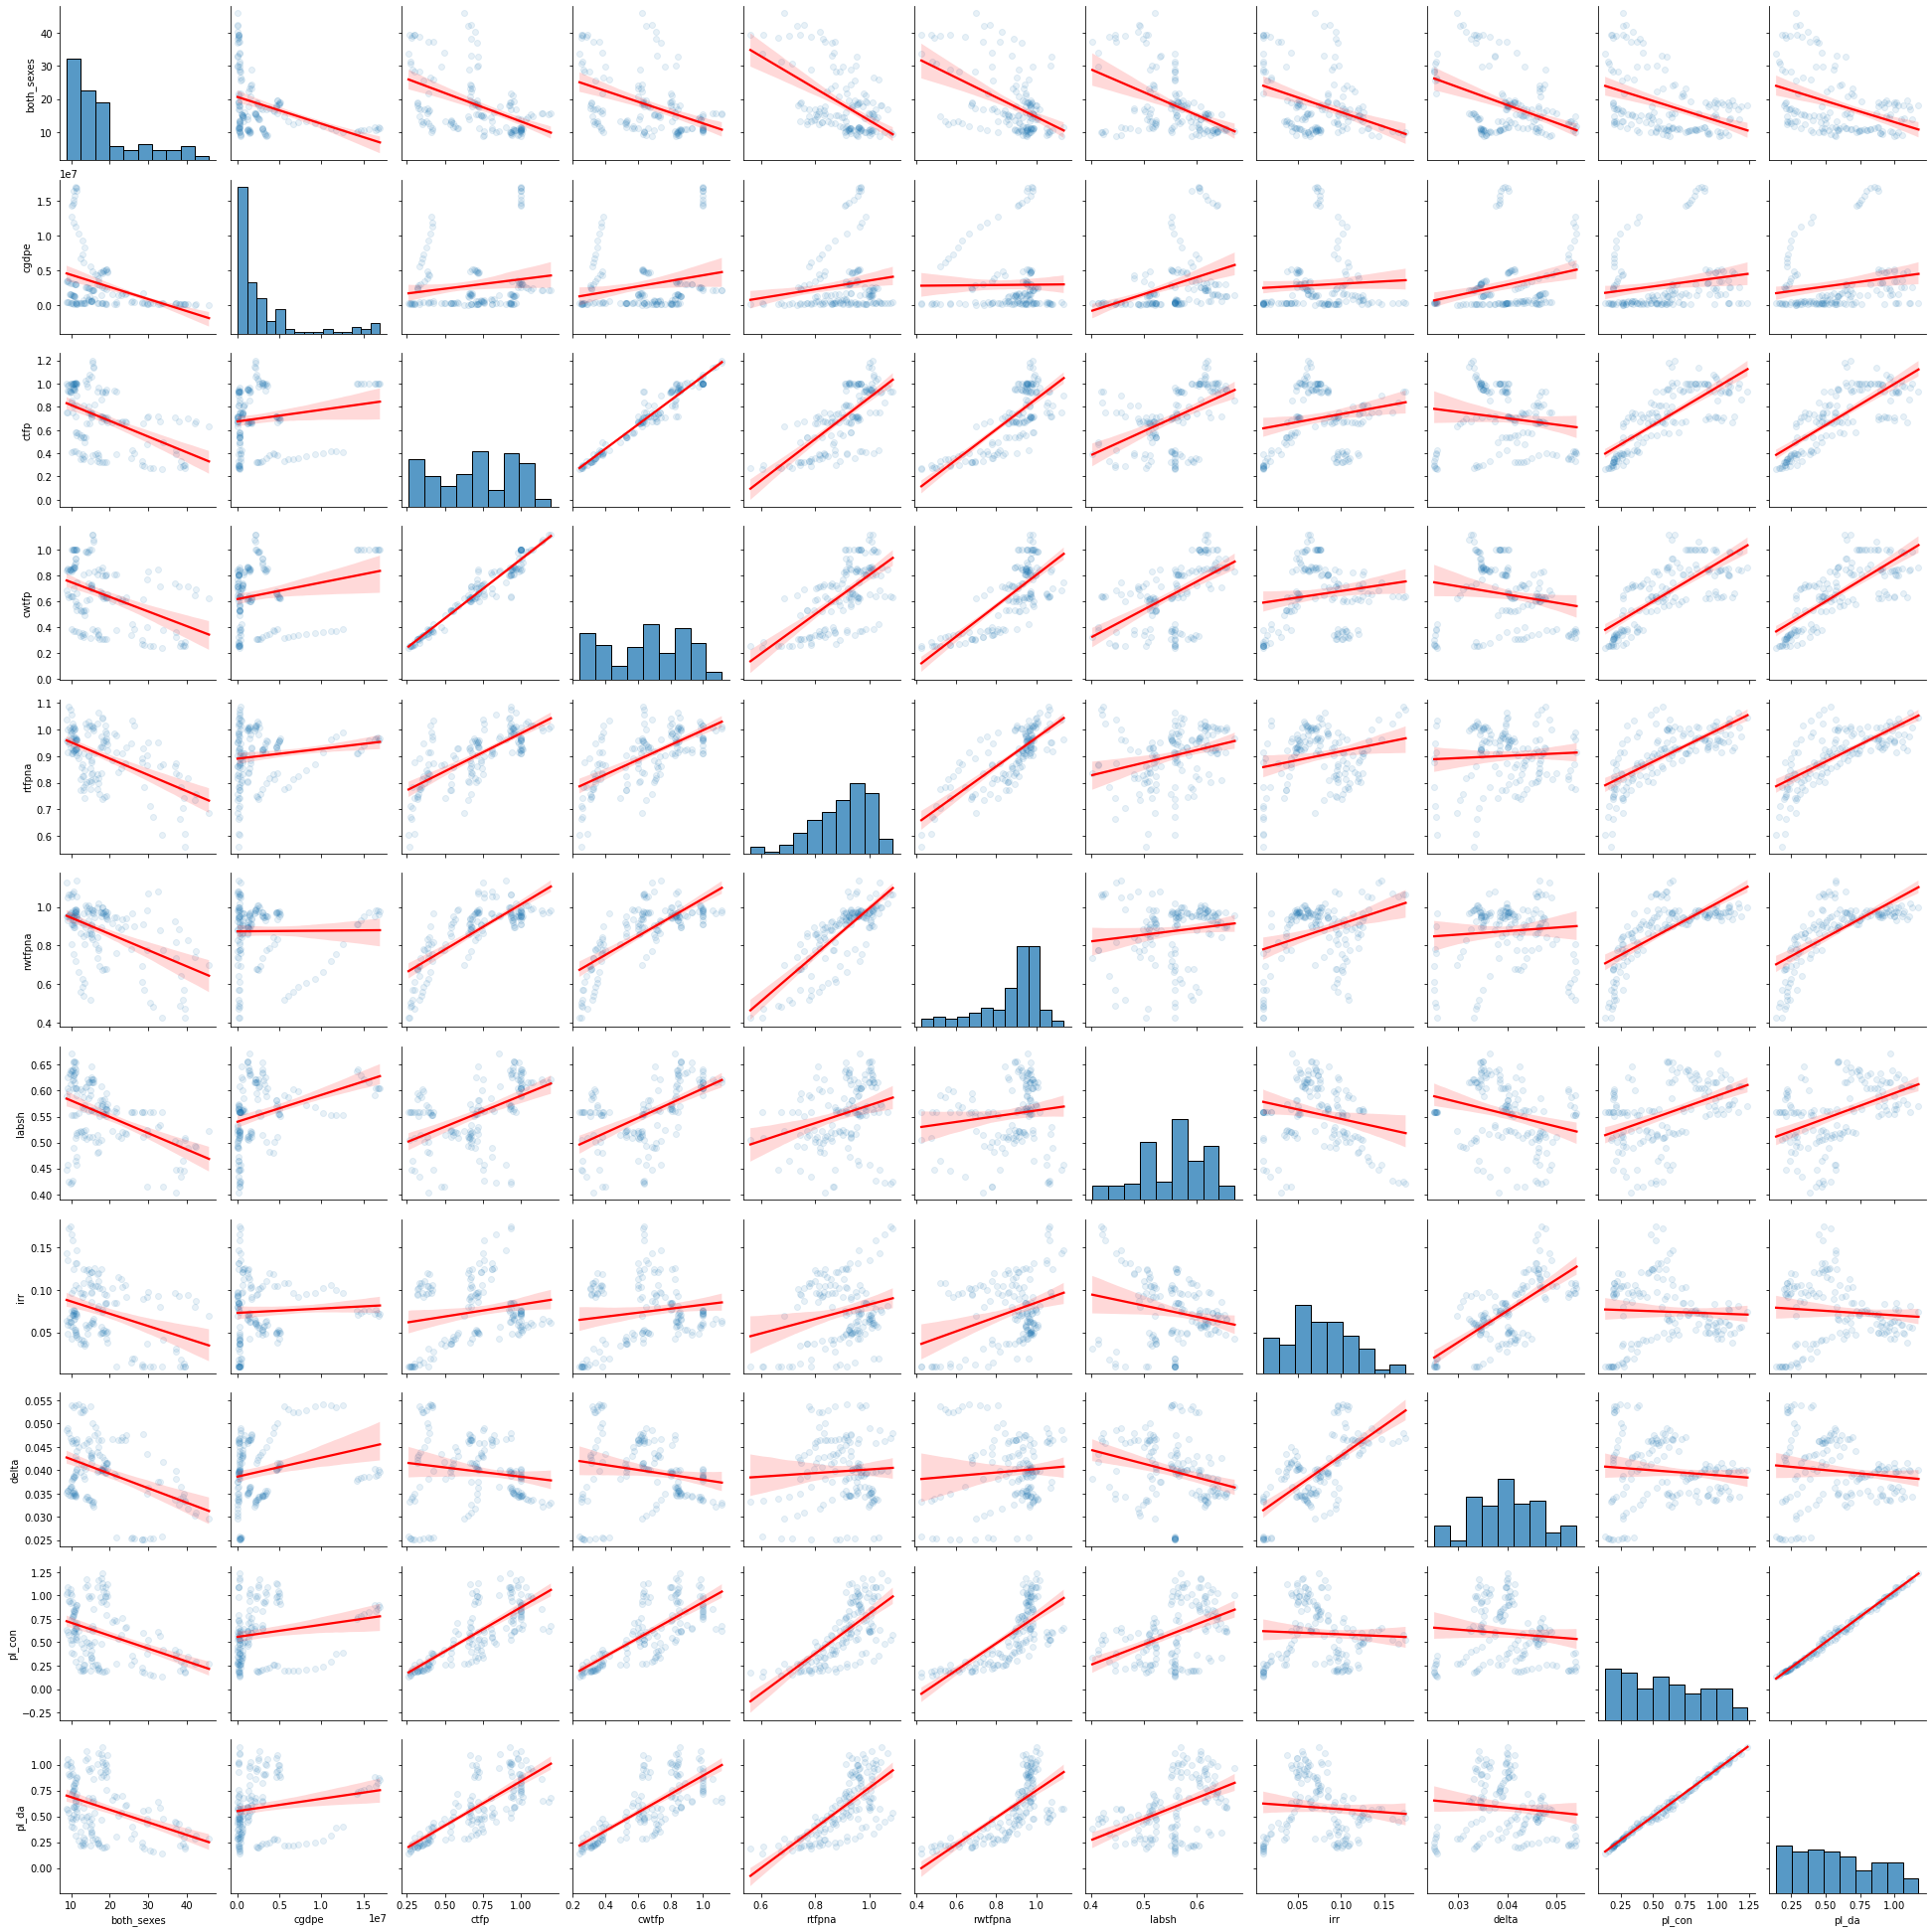

In [10]:
quant_dogs1 = ['both_sexes', 'cgdpe', 'ctfp', 'cwtfp', 'rtfpna', 'rwtfpna', 'labsh',
       'irr', 'delta', 'pl_con', 'pl_da']
quant_dogs2 = ['both_sexes', 'cgdpe', 'pl_gdpo', 'csh_c', 'csh_i', 'csh_g',
       'csh_r', 'pl_c', 'pl_g', 'pl_x', 'pl_k']

plot_variable_pairs(train, quant_dogs1)

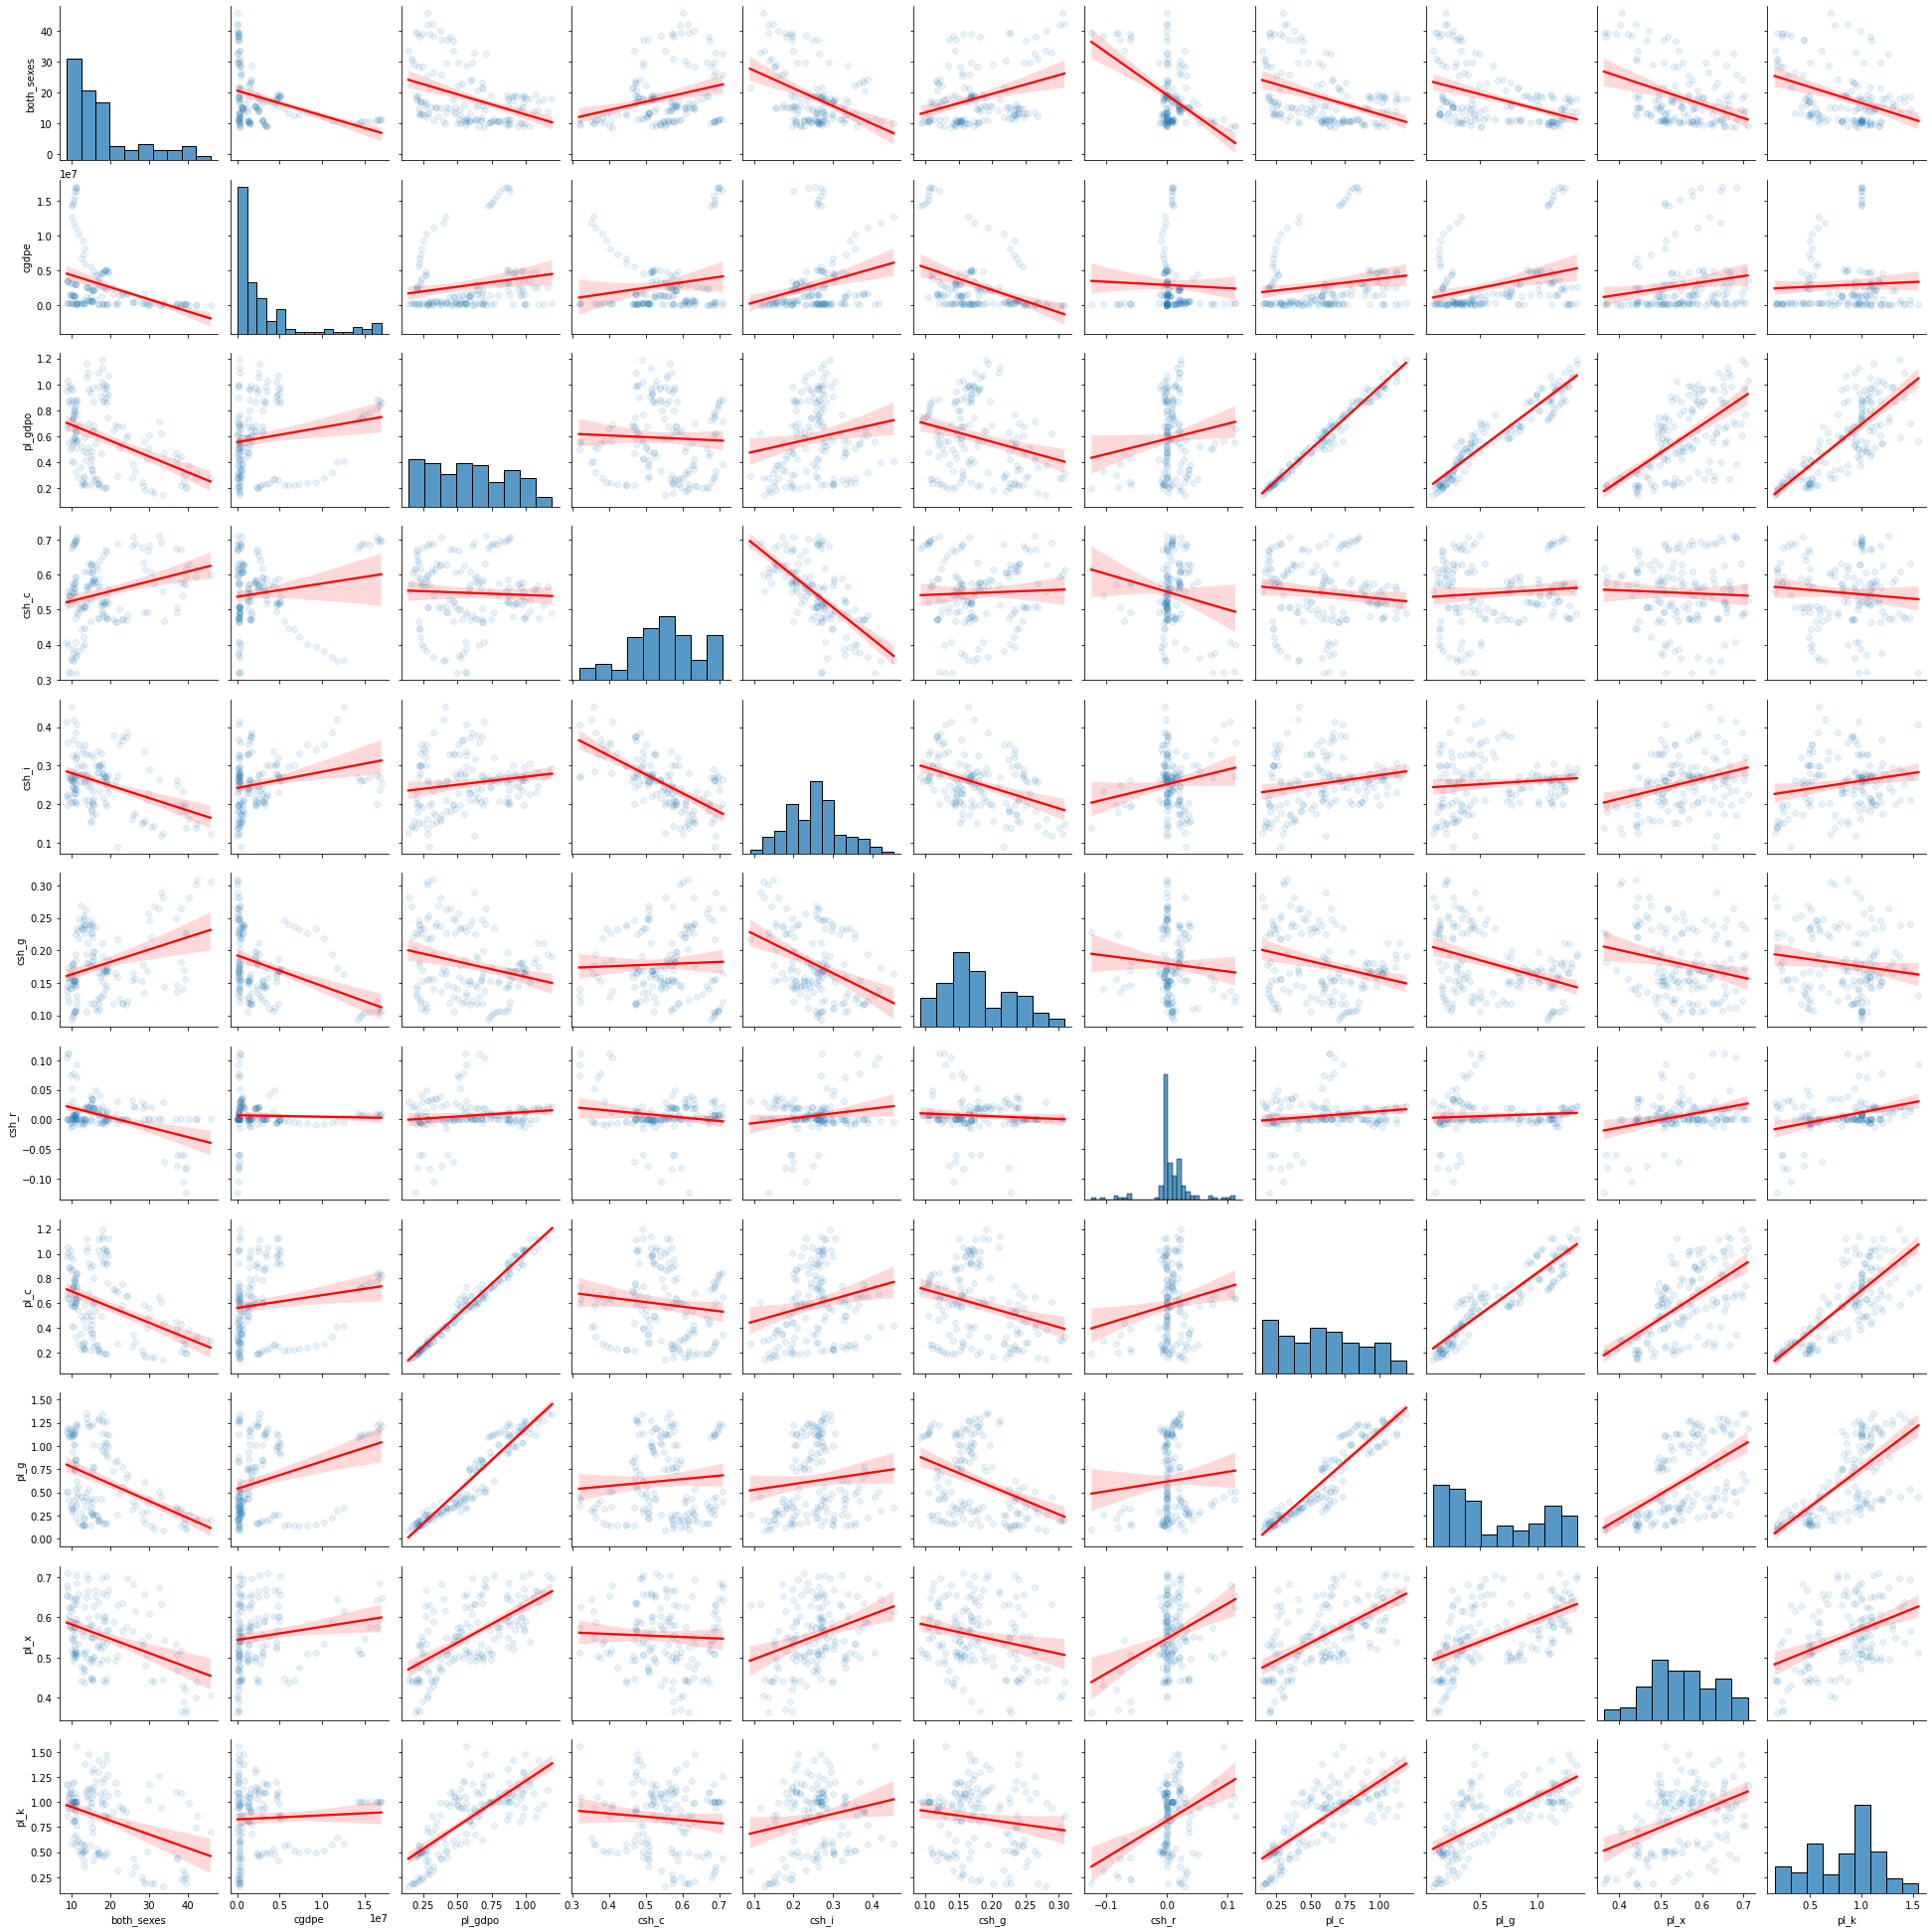

In [14]:
plot_variable_pairs(train, quant_dogs2)

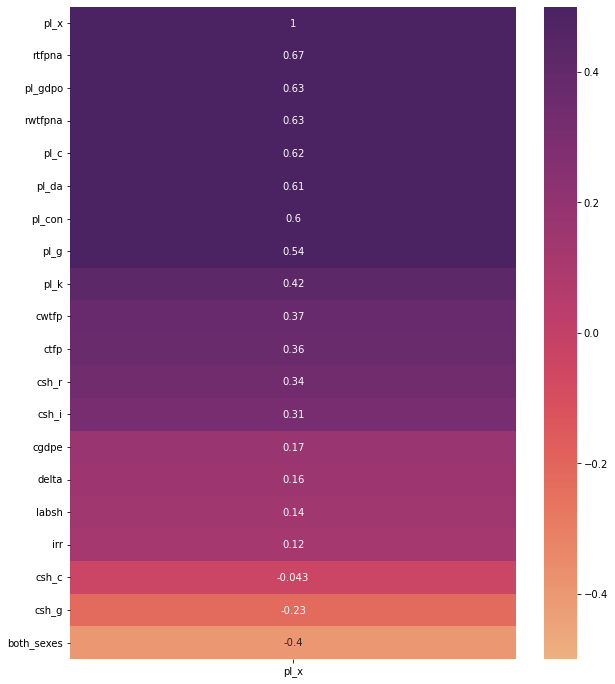

In [15]:
plt.figure(figsize=(10,12))
heatmap = sns.heatmap(train.corr()[['pl_x']].sort_values(by='pl_x', ascending=False), vmin=-.5, vmax=.5, annot=True,cmap='flare')

In [ ]:
train

In [6]:
import mitosheet
mitosheet.sheet(train, analysis_to_replay="id-drflnhirhb")

MitoWidget(analysis_data_json='{"analysisName": "id-drflnhirhb", "analysisToReplay": null, "code": [], "stepSu…

In [7]:
def explore_multivariate(train, target, cat_vars, quant_dogs):
    '''
    This function takes in takes in a dataframe, the name of the binary
    target variable, a list of the names of the categorical variables
    and a list of the names of the quantitative variables.
    It generates boxplots showing the target variable for each
    class of the categorical variables against the quantitative variables.
    '''
    for cat in cat_vars:
        for dog in quant_dogs:
            sns.lmplot(x=dog, y=target, data=train,
                       scatter=True, hue=cat, palette ='muted')
            plt.xlabel(dog)
            plt.ylabel(target)
            plt.title(dog + ' vs ' + target + ' by ' + cat)
            plt.show()

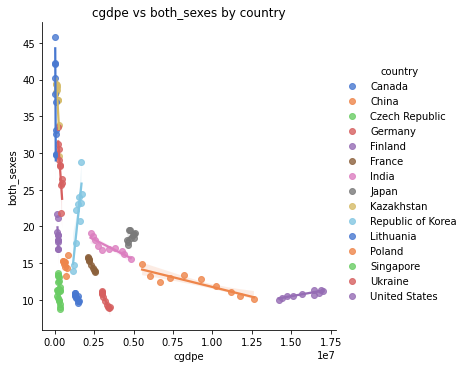

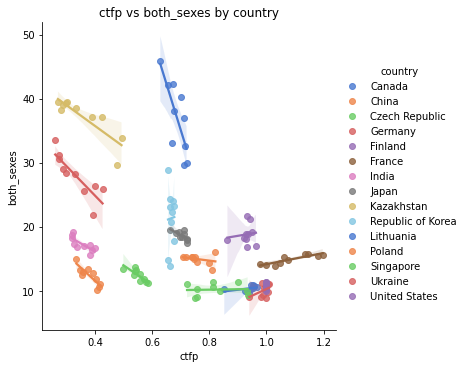

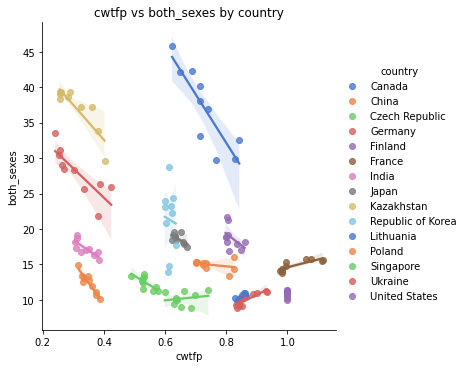

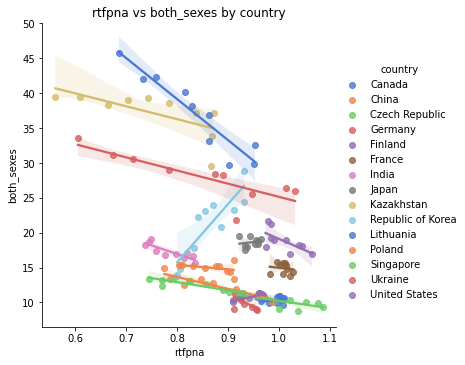

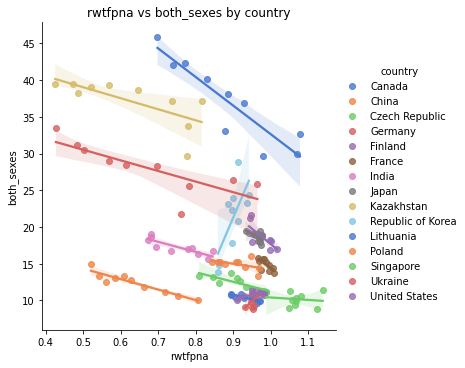

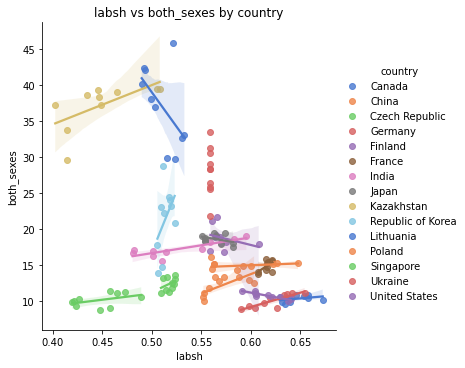

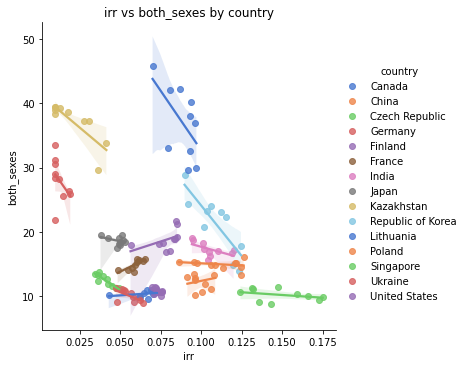

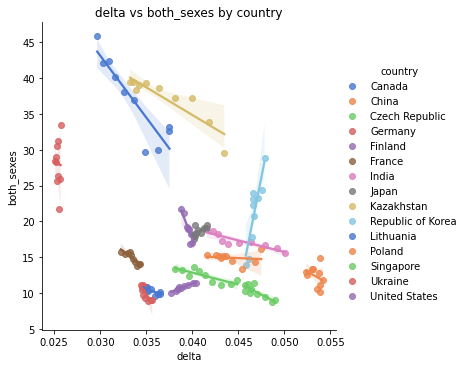

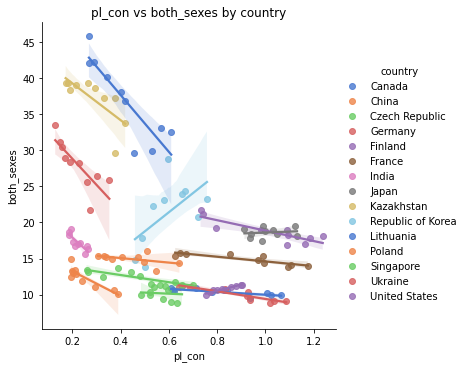

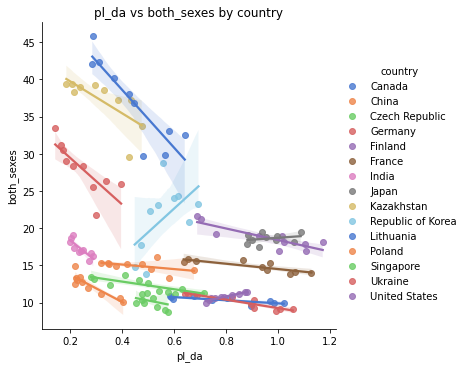

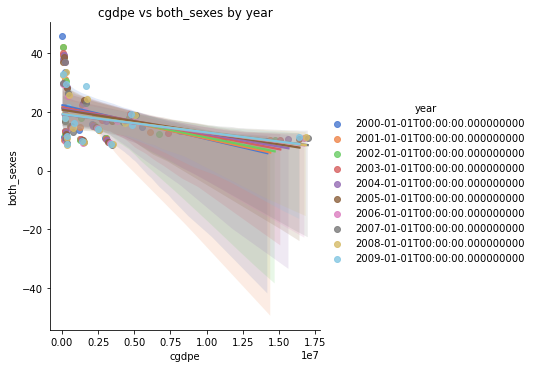

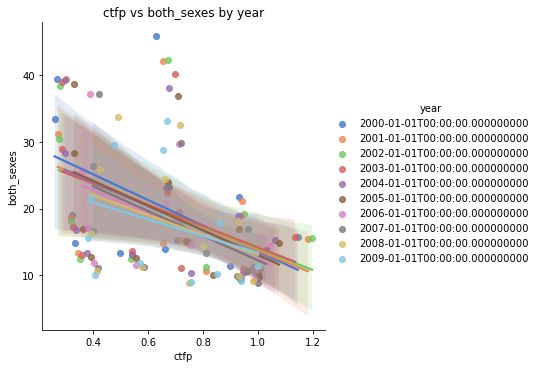

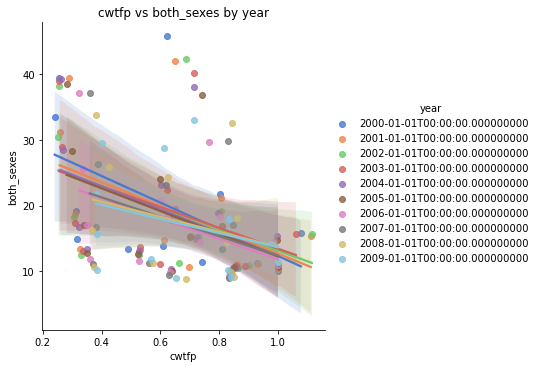

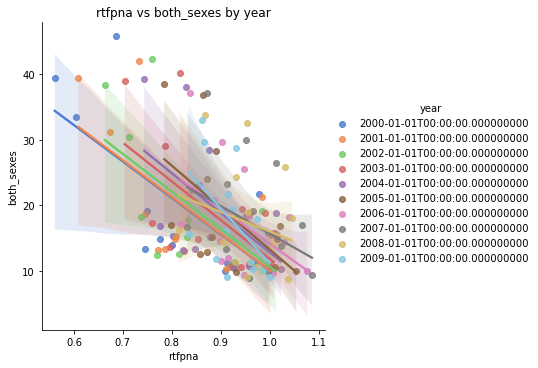

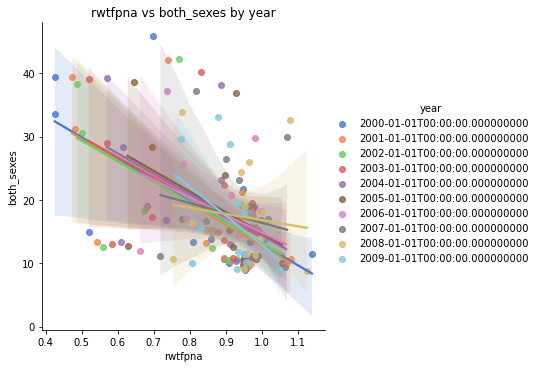

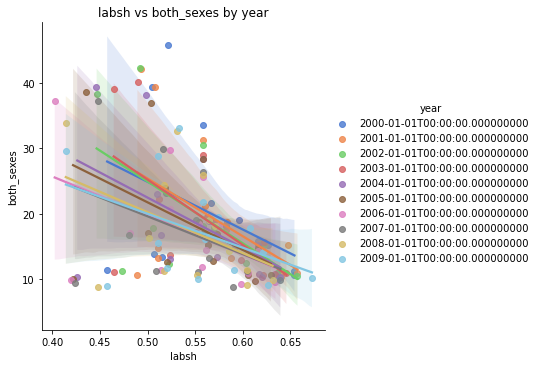

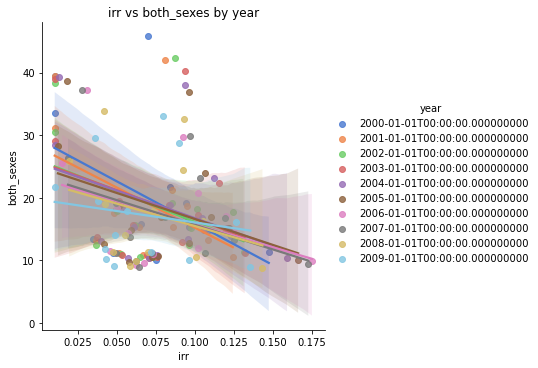

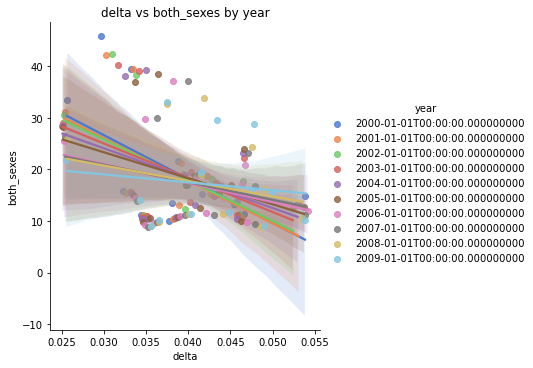

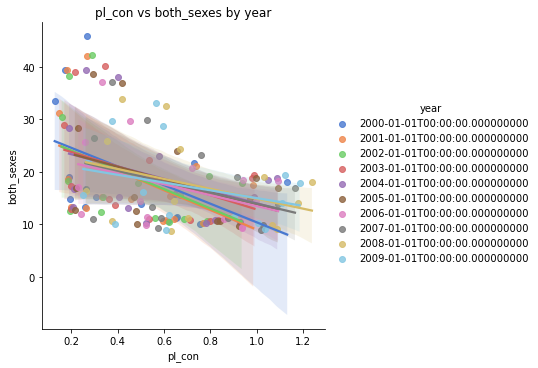

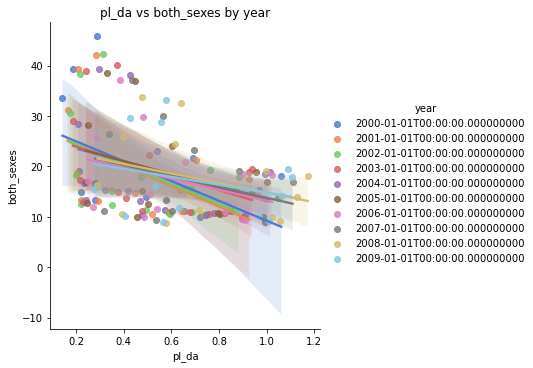

In [8]:
cats = ['country', 'year']
quant_dogs1 = ['cgdpe', 'ctfp', 'cwtfp', 'rtfpna', 'rwtfpna', 'labsh',
       'irr', 'delta', 'pl_con', 'pl_da']
quant_dogs2 = ['pl_gdpo', 'csh_c', 'csh_i', 'csh_g',
       'csh_r', 'pl_c', 'pl_g', 'pl_x', 'pl_k']
explore_multivariate(train, 'both_sexes', cats, quant_dogs1)

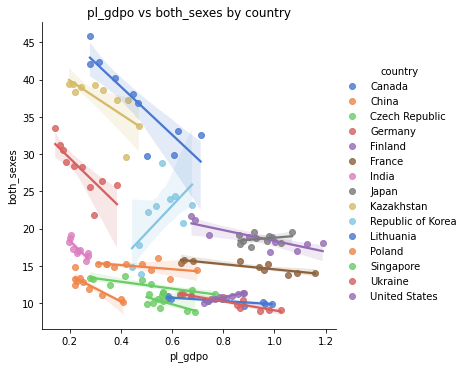

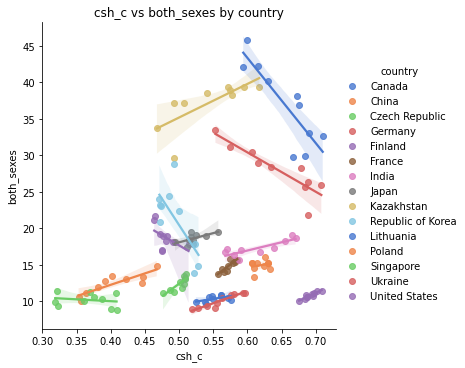

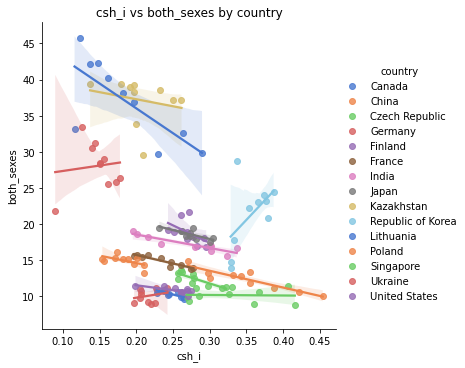

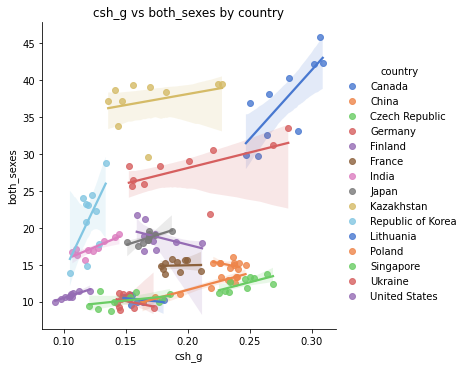

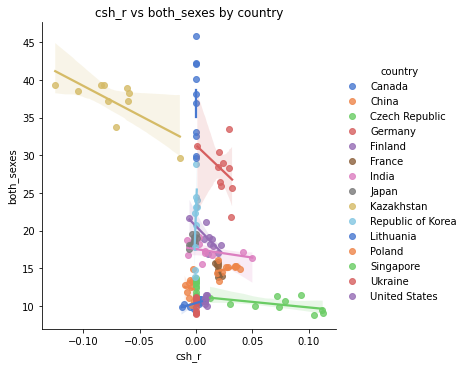

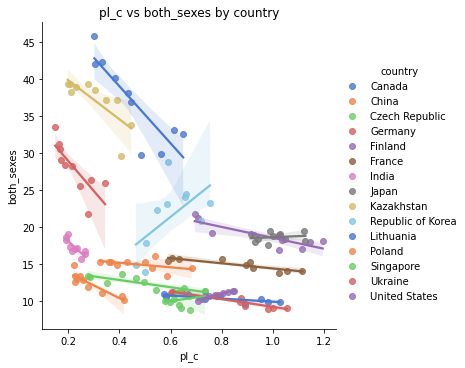

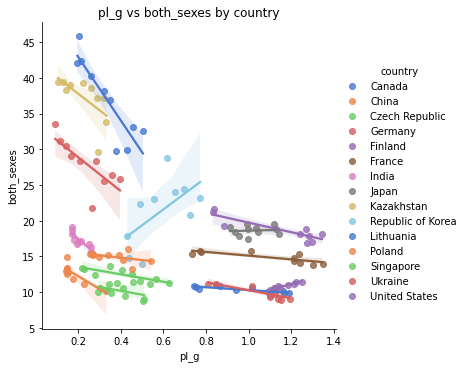

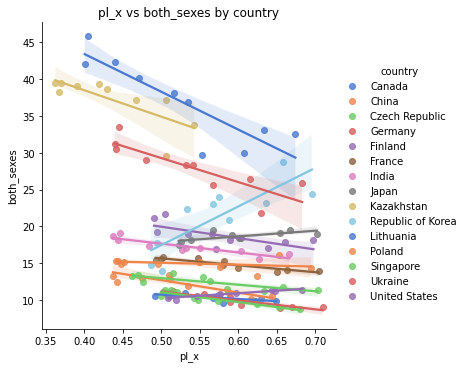

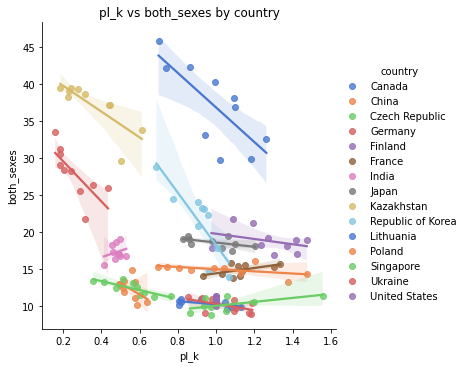

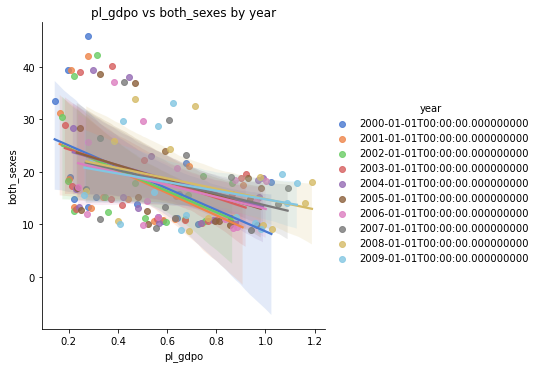

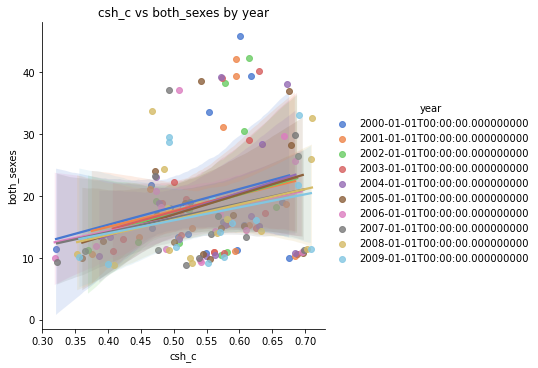

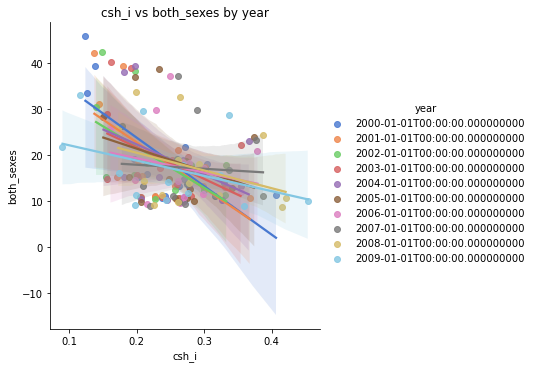

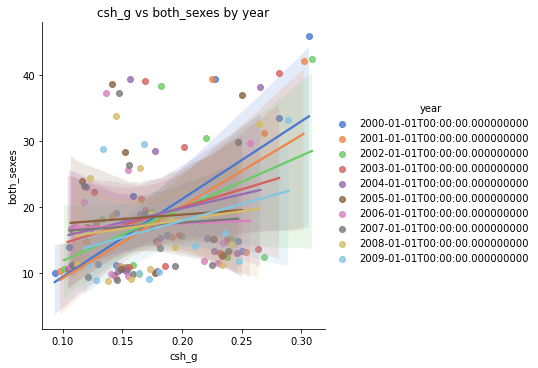

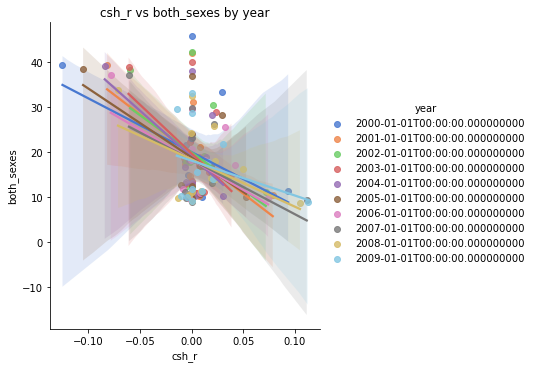

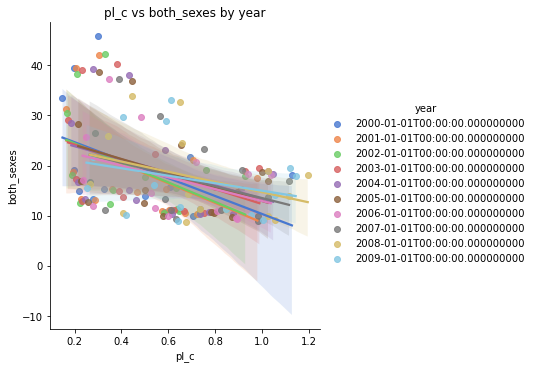

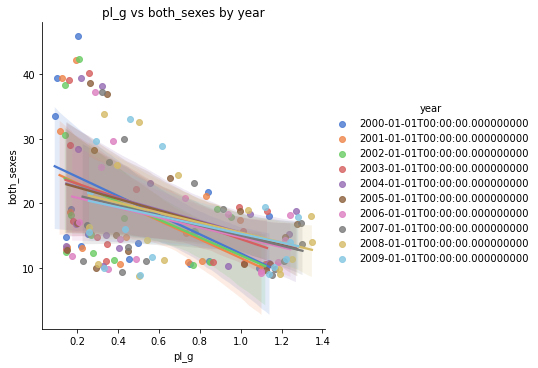

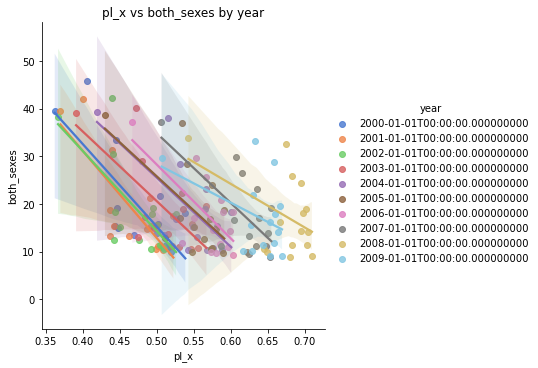

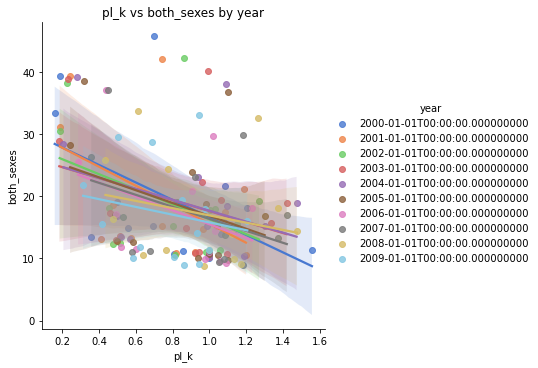

In [9]:
explore_multivariate(train, 'both_sexes', cats, quant_dogs2)

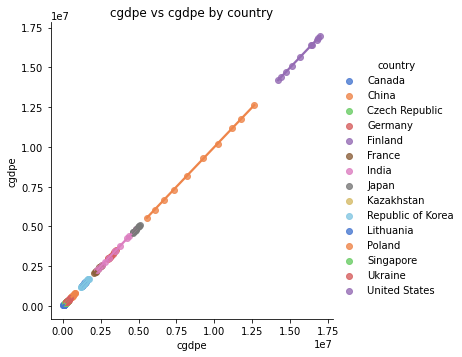

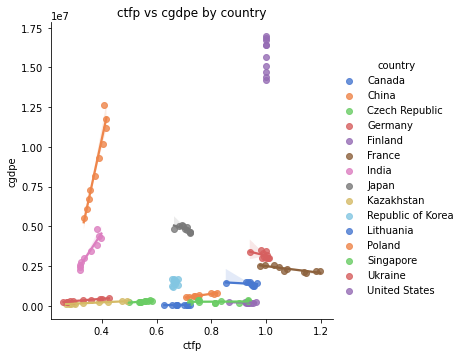

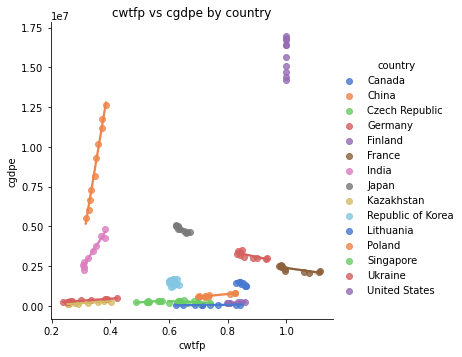

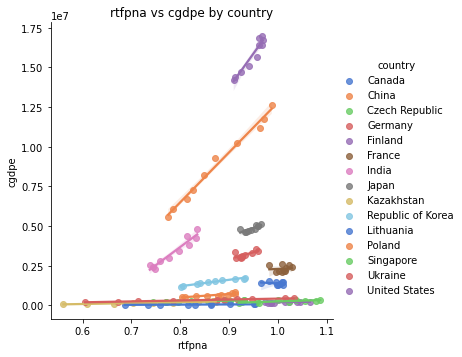

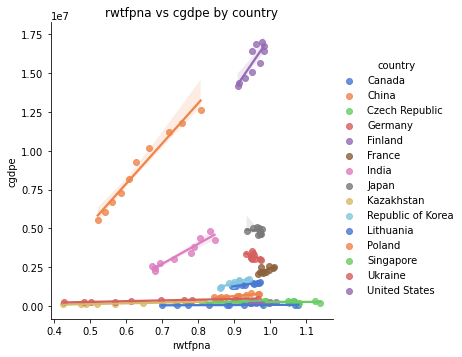

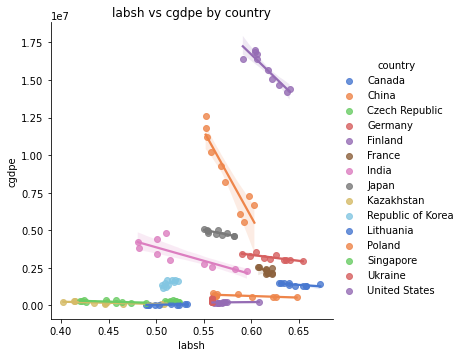

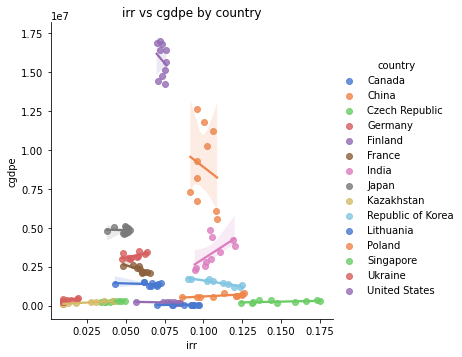

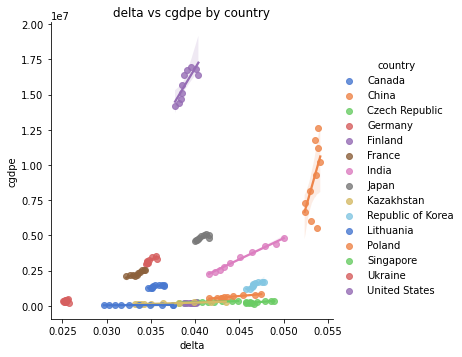

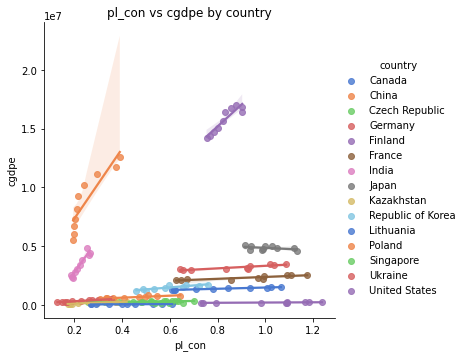

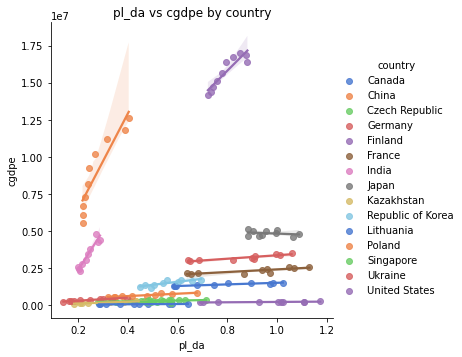

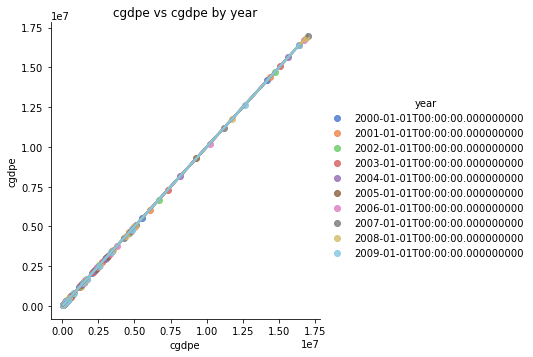

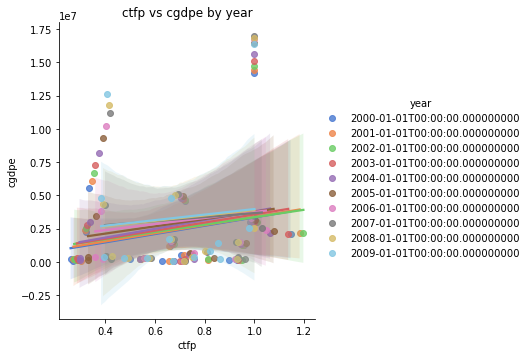

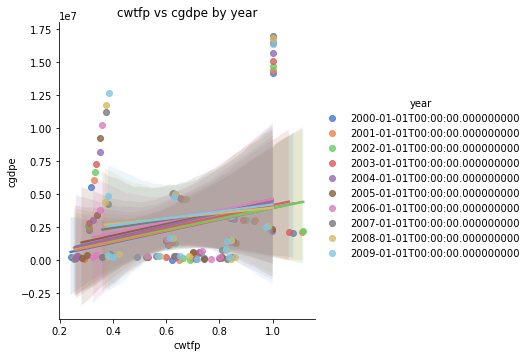

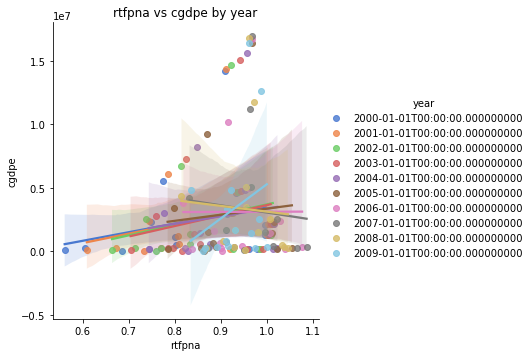

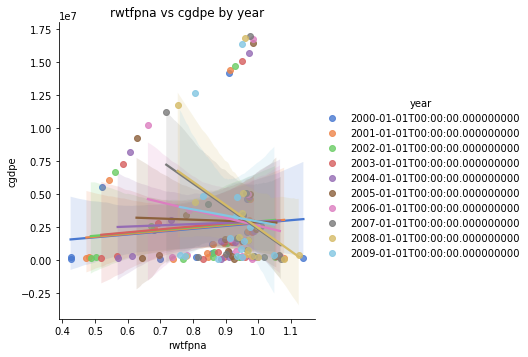

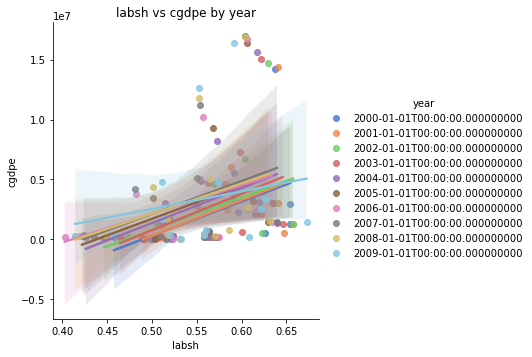

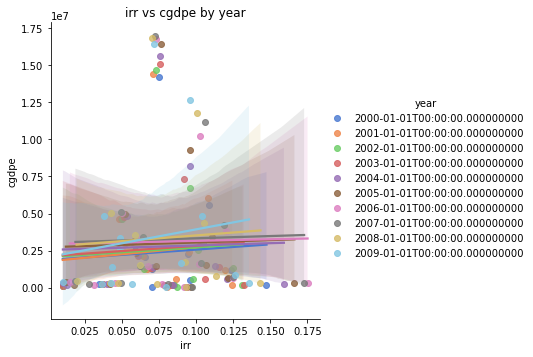

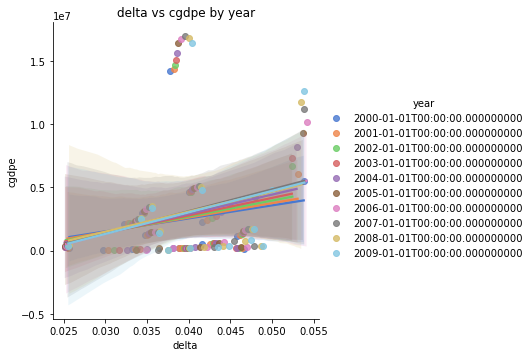

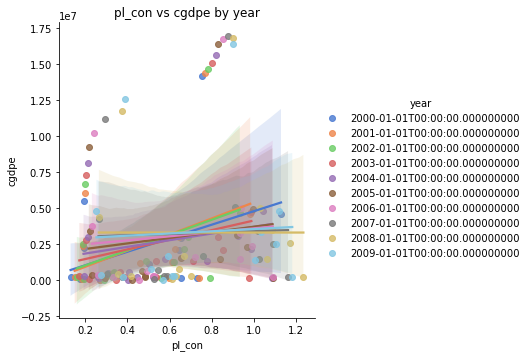

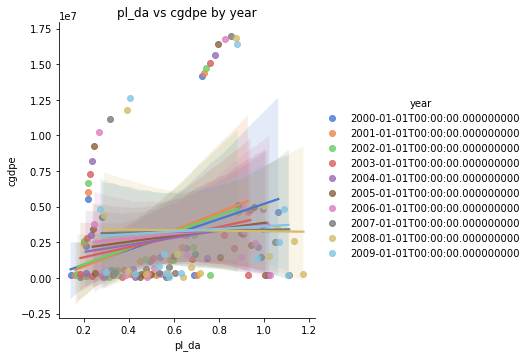

In [10]:
explore_multivariate(train, 'cgdpe', cats, quant_dogs1)

What is the relationship between the suicide rate and CGDPe? 

<AxesSubplot:xlabel='both_sexes'>

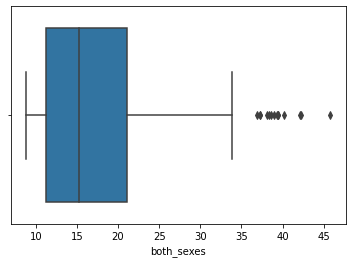

In [18]:
sns.boxplot(train.both_sexes)

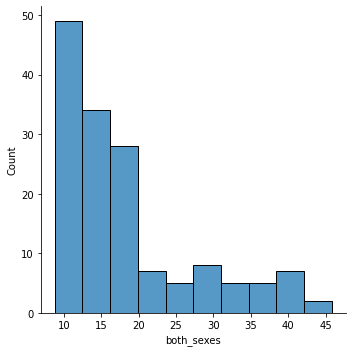

In [16]:
sns.displot(train.both_sexes)

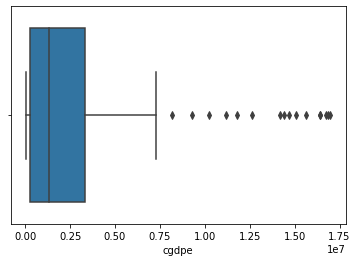

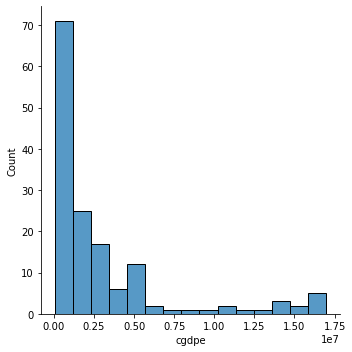

In [20]:
sns.boxplot(train.cgdpe)
plt.show()
sns.displot(train.cgdpe)
plt.show()

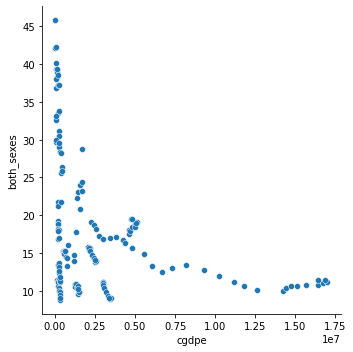

In [24]:
sns.relplot(train.cgdpe, train.both_sexes)

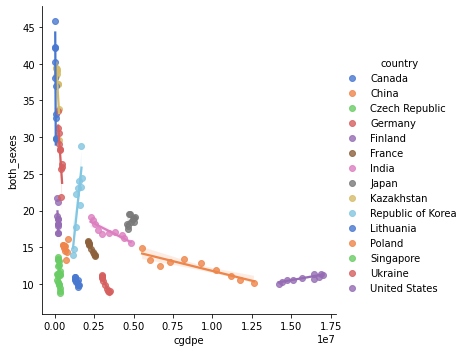

In [37]:
sns.lmplot(x='cgdpe', y='both_sexes', data=train, scatter=True, hue='country', palette ='muted')

In [ ]:
# The bulk of suicide rates fall under low cgdpe. As cgdpe rises, less suicides are present. 

In [25]:
train.columns

Index(['country', 'year', 'cgdpe', 'ctfp', 'cwtfp', 'rtfpna', 'rwtfpna',
       'labsh', 'irr', 'delta', 'pl_con', 'pl_da', 'pl_gdpo', 'csh_c', 'csh_i',
       'csh_g', 'csh_r', 'pl_c', 'pl_g', 'pl_x', 'pl_k', 'both_sexes'],
      dtype='object')

What is the relationship between the suicide rate and Total Factor Productivity TFP) at current PPPs (ctfp)? 

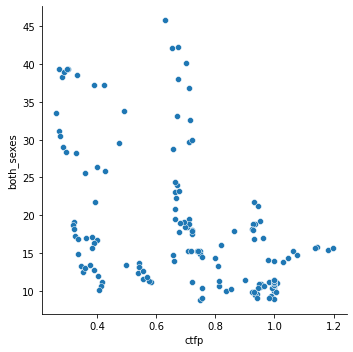

In [29]:
sns.relplot(train.ctfp, train.both_sexes)

In [ ]:
# There does not appear to be a discernible pattern.

What is the relationship between the suicide rate and TFP at current PPPs when it is welfare-relevant (cwtfp)? 

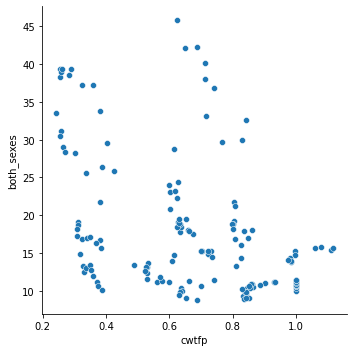

In [30]:
sns.relplot(train.cwtfp, train.both_sexes)

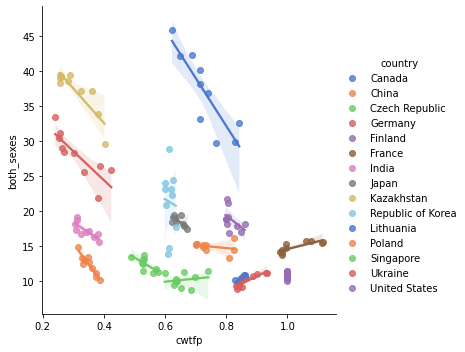

In [36]:
sns.lmplot(x='cwtfp', y='both_sexes', data=train, scatter=True, hue='country', palette ='muted')

In [31]:
# very similar to the former. 

How does cgdp based on output rather than expenditure (ie pl_gdpo vs cgdpe) impact suicide rate distribution?

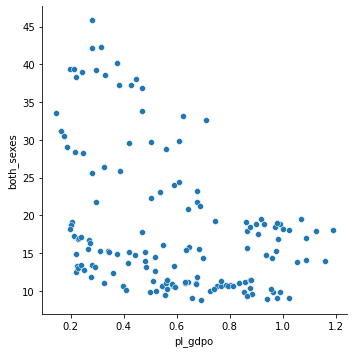

In [32]:
sns.relplot(train.pl_gdpo, train.both_sexes)

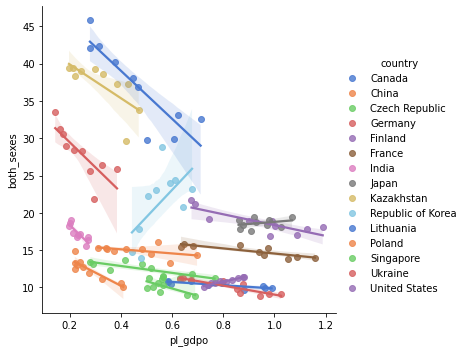

In [35]:
sns.lmplot(x='pl_gdpo', y='both_sexes', data=train, scatter=True, hue='country', palette ='muted')

In [58]:
train['year_int'] = train['year'].astype(str).str[0:4]
train['year_int'] = train['year_int'].astype(int)
#train.year_int.str[0:4]

How have the suicide rates of countries changed over time?

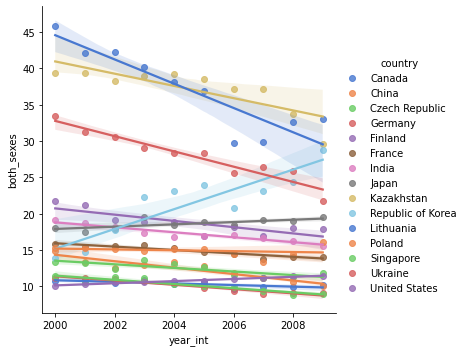

In [3]:
sns.lmplot(x='year_int', y='both_sexes', data=train,
           scatter=True, hue='country', palette ='muted')

In [26]:
# in most cases it has remained about steady;
#South Korea and Japan are clearly increasing.
# Lithuania's rapidly decreased during these years. 

Does the mean suicide rate in republic of korea differ considerably from that of the other countries' mean? 

- $H0$: The Mean Suicide Rate in South Korea does not significantly differ from the mean Suicide Rate of all countries in this DataFrame

- $Ha$: Mean of Suicide Rate in South Korea > the mean Suicide Rate of all other countries.

In [24]:
alpha = 0.5
korea = train[train.country == 'Republic of Korea'].both_sexes
overall_mean = train.both_sexes.mean()

print(f'The mean suicide rate of all countries is: {overall_mean}')

t, p = stats.ttest_1samp(korea, overall_mean)

print(t, p/2, alpha)

The mean suicide rate of all countries is: 18.288666666666668
2.076644461650836 0.0338159967664963 0.5


In [25]:
if p/2 > alpha:
    print("We fail to reject the Null Hypothesis")
elif t > 0:
    print("We fail to reject the Null Hypothesis")
else:
    print("We reject the Null Hypothesis")

We fail to reject the Null Hypothesis


So although the suicide rate is increasing, it is not doing so rapidly enough or substantially enough to vary significantly from the overall rate. 

Does the mean suicide rate in Lithuania differ considerably from that of the other countries' mean? 

- $H0$: Mean of Suicide Rate in Lithuania = Mean Suicide Rate of all countries

- $Ha$: Mean of Suicide Rate in Lithuania > Mean profit of all categories

In [28]:
alpha = 0.5
lithuania = train[train.country == 'Lithuania'].both_sexes
overall_mean = train.both_sexes.mean()

print(f'The mean suicide rate of all countries is: {overall_mean}')

t, p = stats.ttest_1samp(lithuania, overall_mean)

print(t, p/2, alpha)

if p/2 > alpha:
    print("We fail to reject the Null Hypothesis")
elif t > 0:
    print("We fail to reject the Null Hypothesis")
else:
    print("We reject the Null Hypothesis")

The mean suicide rate of all countries is: 18.288666666666668
10.624874313198939 1.0778829430396792e-06 0.5
We fail to reject the Null Hypothesis


Does the mean suicide rate in Kazakhstan differ considerably from that of the other countries' mean? 

- $H0$: Mean of Suicide Rate in Kazakhstan = Mean Suicide Rate of all countries

- $Ha$: Mean of Suicide Rate in Kazakhstan > Mean profit of all categories

In [30]:
alpha = 0.5
kazakhstan = train[train.country == 'Kazakhstan'].both_sexes
overall_mean = train.both_sexes.mean()

print(f'The mean suicide rate of all countries is: {overall_mean}')

t, p = stats.ttest_1samp(korea, overall_mean)

print(t, p/2, alpha)

if p/2 > alpha:
    print("We fail to reject the Null Hypothesis")
elif t > 0:
    print("We fail to reject the Null Hypothesis")
else:
    print("We reject the Null Hypothesis")

The mean suicide rate of all countries is: 18.288666666666668
10.624874313198939 1.0778829430396792e-06 0.5
We fail to reject the Null Hypothesis


Pre-set values for correlation tests. 

In [31]:
n = train.shape[0]    # number of observations
degf = n - 2         # degrees of freedom: the # of values in the final calculation of a statistic that are free to vary.
conf_interval = .95  # desired confidence interval
α = 1 - conf_interval

In [33]:
train.columns

Index(['country', 'year', 'cgdpe', 'ctfp', 'cwtfp', 'rtfpna', 'rwtfpna',
       'labsh', 'irr', 'delta', 'pl_con', 'pl_da', 'pl_gdpo', 'csh_c', 'csh_i',
       'csh_g', 'csh_r', 'pl_c', 'pl_g', 'pl_x', 'pl_k', 'both_sexes',
       'year_int'],
      dtype='object')

Check correlation between suicide rates for both_sexes and several features. 
When p is less than alpha, we reject our null hypothesis that there is no linear correlation between the dependent and independent variable

In [69]:
# Pre-set values, before the test to establish confidence interval and the alpha
n = df.shape[0]     # number of observations
degf = n - 2        # degrees of freedom: the # of values in the final calculation
                    #  of a statistic that are free to vary.
conf_interval = .95 # desired confidence interval. Typically this is the standard.
α = 1 - conf_interval

True

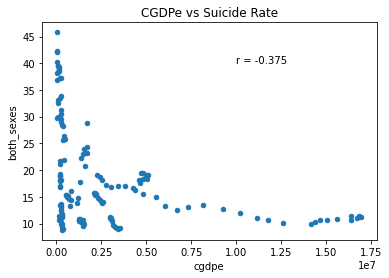

In [84]:
r, p = stats.pearsonr(train.cgdpe, train.both_sexes)

train.plot.scatter('cgdpe', 'both_sexes')
plt.title('CGDPe vs Suicide Rate')
plt.text(10000000, 40, f'r = {r:.3f}')
p < α

True

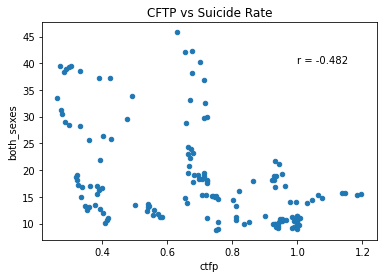

In [68]:
r, p = stats.pearsonr(train.ctfp, train.both_sexes)

train.plot.scatter('ctfp', 'both_sexes')
plt.title('CFTP vs Suicide Rate')
plt.text(1, 40, f'r = {r:.3f}')
p < α

True

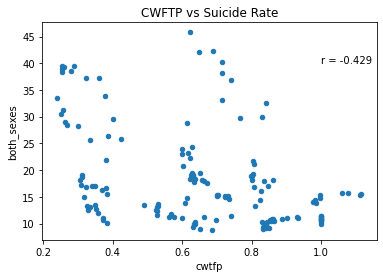

In [70]:
r, p = stats.pearsonr(train.cwtfp, train.both_sexes)

train.plot.scatter('cwtfp', 'both_sexes')
plt.title('CWFTP vs Suicide Rate')
plt.text(1, 40, f'r = {r:.3f}')
p < α

 P is less than alpha: True


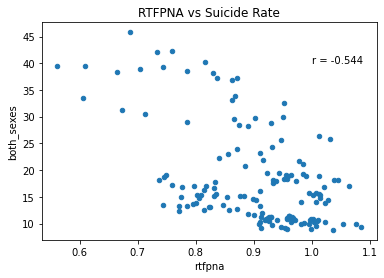

 P is less than alpha: True


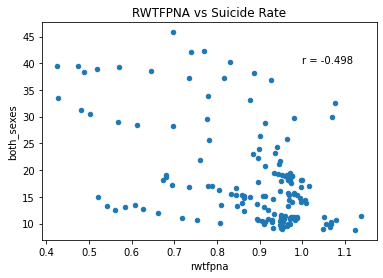

 P is less than alpha: True


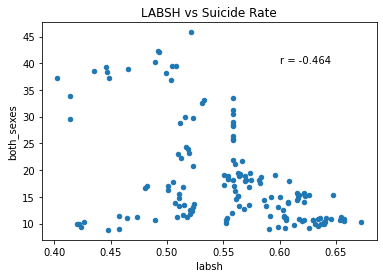

 P is less than alpha: True


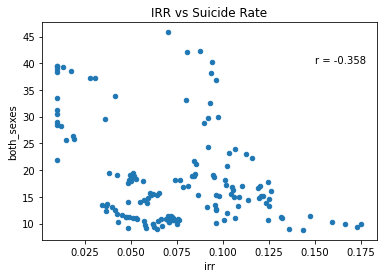

In [80]:
r, p = stats.pearsonr(train.rtfpna, train.both_sexes)

train.plot.scatter('rtfpna', 'both_sexes')
plt.title('RTFPNA vs Suicide Rate')
plt.text(1, 40, f'r = {r:.3f}')
print(f' P is less than alpha: {p < α}')
plt.show()

r, p = stats.pearsonr(train.rwtfpna, train.both_sexes)

train.plot.scatter('rwtfpna', 'both_sexes')
plt.title('RWTFPNA vs Suicide Rate')
plt.text(1, 40, f'r = {r:.3f}')
print(f' P is less than alpha: {p < α}')
plt.show()

r, p = stats.pearsonr(train.labsh, train.both_sexes)

train.plot.scatter('labsh', 'both_sexes')
plt.title('LABSH vs Suicide Rate')
plt.text(0.6, 40, f'r = {r:.3f}')
print(f' P is less than alpha: {p < α}')
plt.show()

r, p = stats.pearsonr(train.irr, train.both_sexes)

train.plot.scatter('irr', 'both_sexes')
plt.title('IRR vs Suicide Rate')
plt.text(0.15, 40, f'r = {r:.3f}')
print(f' P is less than alpha: {p < α}')
plt.show()

In [85]:
train.columns

Index(['country', 'year', 'cgdpe', 'ctfp', 'cwtfp', 'rtfpna', 'rwtfpna',
       'labsh', 'irr', 'delta', 'pl_con', 'pl_da', 'pl_gdpo', 'csh_c', 'csh_i',
       'csh_g', 'csh_r', 'pl_c', 'pl_g', 'pl_x', 'pl_k', 'both_sexes',
       'year_int'],
      dtype='object')

 P is less than alpha: True


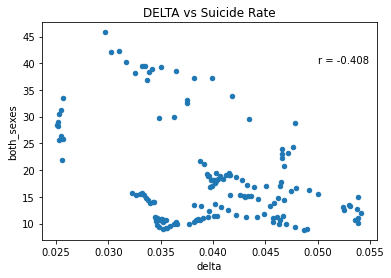

 P is less than alpha: True


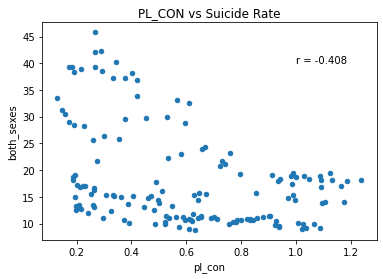

 P is less than alpha: True


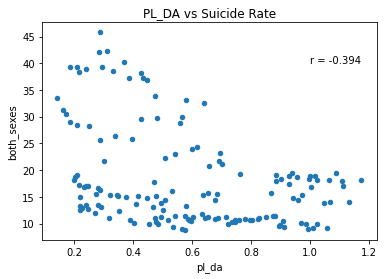

 P is less than alpha: True


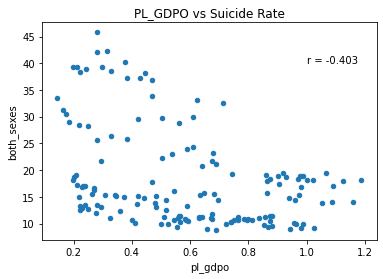

In [90]:
r, p = stats.pearsonr(train.delta, train.both_sexes)

train.plot.scatter('delta', 'both_sexes')
plt.title('DELTA vs Suicide Rate')
plt.text(.05, 40, f'r = {r:.3f}')
print(f' P is less than alpha: {p < α}')
plt.show()

r, p = stats.pearsonr(train.pl_con, train.both_sexes)

train.plot.scatter('pl_con', 'both_sexes')
plt.title('PL_CON vs Suicide Rate')
plt.text(1, 40, f'r = {r:.3f}')
print(f' P is less than alpha: {p < α}')
plt.show()

r, p = stats.pearsonr(train.pl_da, train.both_sexes)

train.plot.scatter('pl_da', 'both_sexes')
plt.title('PL_DA vs Suicide Rate')
plt.text(1, 40, f'r = {r:.3f}')
print(f' P is less than alpha: {p < α}')
plt.show()

r, p = stats.pearsonr(train.pl_gdpo, train.both_sexes)

train.plot.scatter('pl_gdpo', 'both_sexes')
plt.title('PL_GDPO vs Suicide Rate')
plt.text(1, 40, f'r = {r:.3f}')
print(f' P is less than alpha: {p < α}')
plt.show()

In [91]:
train.columns

Index(['country', 'year', 'cgdpe', 'ctfp', 'cwtfp', 'rtfpna', 'rwtfpna',
       'labsh', 'irr', 'delta', 'pl_con', 'pl_da', 'pl_gdpo', 'csh_c', 'csh_i',
       'csh_g', 'csh_r', 'pl_c', 'pl_g', 'pl_x', 'pl_k', 'both_sexes',
       'year_int'],
      dtype='object')

 P is less than alpha: True


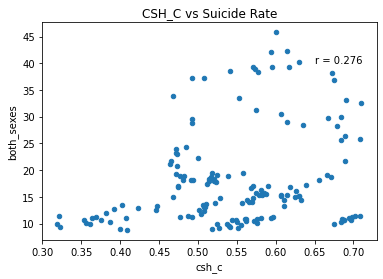

 P is less than alpha: True


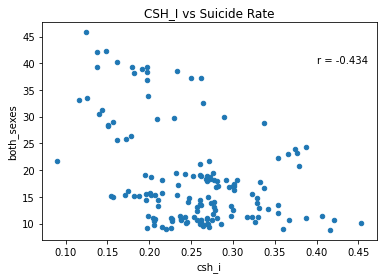

 P is less than alpha: True


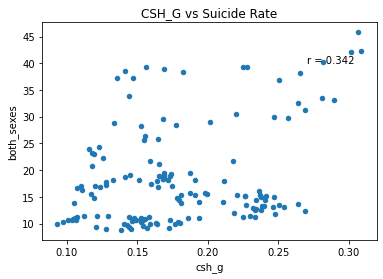

 P is less than alpha: True


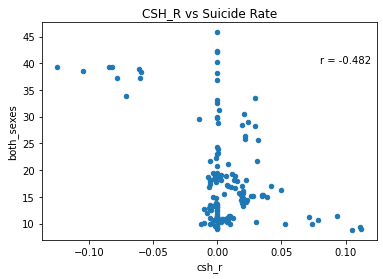

In [93]:
r, p = stats.pearsonr(train.csh_c, train.both_sexes)

train.plot.scatter('csh_c', 'both_sexes')
plt.title('CSH_C vs Suicide Rate')
plt.text(.65, 40, f'r = {r:.3f}')
print(f' P is less than alpha: {p < α}')
plt.show()

r, p = stats.pearsonr(train.csh_i, train.both_sexes)

train.plot.scatter('csh_i', 'both_sexes')
plt.title('CSH_I vs Suicide Rate')
plt.text(.40, 40, f'r = {r:.3f}')
print(f' P is less than alpha: {p < α}')
plt.show()

r, p = stats.pearsonr(train.csh_g, train.both_sexes)

train.plot.scatter('csh_g', 'both_sexes')
plt.title('CSH_G vs Suicide Rate')
plt.text(.27, 40, f'r = {r:.3f}')
print(f' P is less than alpha: {p < α}')
plt.show()

r, p = stats.pearsonr(train.csh_r, train.both_sexes)

train.plot.scatter('csh_r', 'both_sexes')
plt.title('CSH_R vs Suicide Rate')
plt.text(.08, 40, f'r = {r:.3f}')
print(f' P is less than alpha: {p < α}')
plt.show()

 P is less than alpha: True


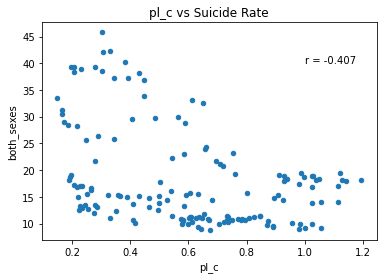

 P is less than alpha: True


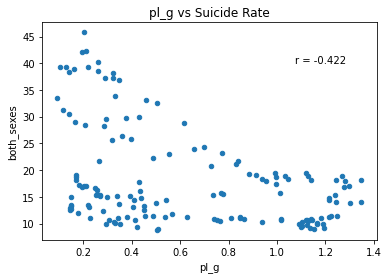

 P is less than alpha: True


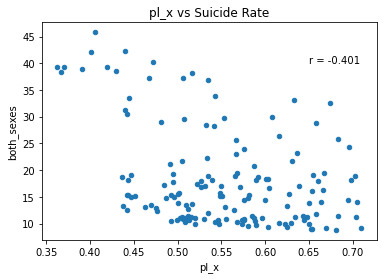

 P is less than alpha: True


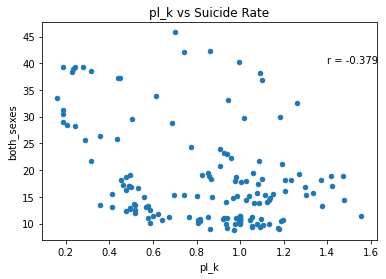

In [103]:
r, p = stats.pearsonr(train.pl_c, train.both_sexes)

train.plot.scatter('pl_c', 'both_sexes')
plt.title('pl_c vs Suicide Rate')
plt.text(1, 40, f'r = {r:.3f}')
print(f' P is less than alpha: {p < α}')
plt.show()

r, p = stats.pearsonr(train.pl_g, train.both_sexes)

train.plot.scatter('pl_g', 'both_sexes')
plt.title('pl_g vs Suicide Rate')
plt.text(1.075, 40, f'r = {r:.3f}')
print(f' P is less than alpha: {p < α}')
plt.show()

r, p = stats.pearsonr(train.pl_x, train.both_sexes)

train.plot.scatter('pl_x', 'both_sexes')
plt.title('pl_x vs Suicide Rate')
plt.text(.65, 40, f'r = {r:.3f}')
print(f' P is less than alpha: {p < α}')
plt.show()

r, p = stats.pearsonr(train.pl_k, train.both_sexes)

train.plot.scatter('pl_k', 'both_sexes')
plt.title('pl_k vs Suicide Rate')
plt.text(1.4, 40, f'r = {r:.3f}')
print(f' P is less than alpha: {p < α}')
plt.show()

All of my features pass the correlation test. 
So they will compete with one another for modeling. Moving on to that, after I scale in the modeling notebook. 

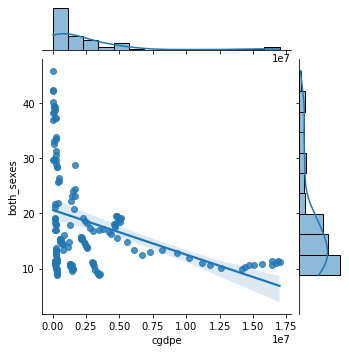

In [99]:
sns.jointplot(x="cgdpe", y="both_sexes", data=train,  kind='reg', height=5)
plt.show()

 P is less than alpha: True


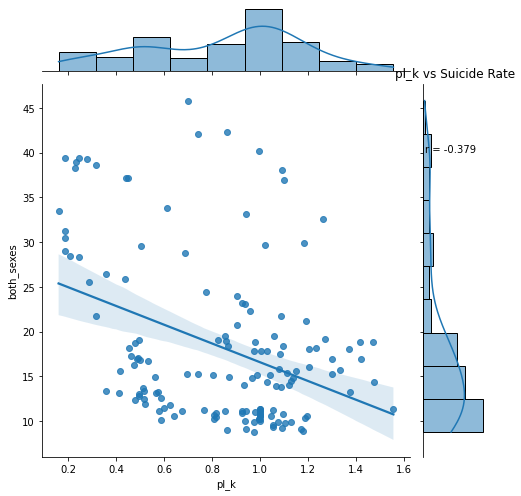

In [101]:
sns.jointplot('pl_k', 'both_sexes', data=train, kind='reg', height=5)
plt.title('pl_k vs Suicide Rate')
plt.text(1.4, 40, f'r = {r:.3f}')
print(f' P is less than alpha: {p < α}')
plt.show()

In [104]:
def explore_jointplots(train, target, quant_dogs):
    '''
    This function takes in takes in a dataframe, the name of the binary target variable, a list of 
    the names of the categorical variables and a list of the names of the quantitative variables.
    It generates boxplots showing the target variable for each class of the categorical variables 
    against the quantitative variables.
    '''
    for dog in quant_dogs:
        sns.jointplot(x=dog, y=target, data=train, kind='reg', height=5)
        plt.xlabel(dog)
        plt.ylabel(target)
        plt.title(dog + ' vs ' + target)
        plt.show()

In [106]:
quant_dogs1 = ['cgdpe', 'ctfp', 'cwtfp', 'rtfpna', 'rwtfpna', 'labsh',
       'irr', 'delta', 'pl_con', 'pl_da']
quant_dogs2 = ['pl_gdpo', 'csh_c', 'csh_i', 'csh_g',
       'csh_r', 'pl_c', 'pl_g', 'pl_x', 'pl_k']

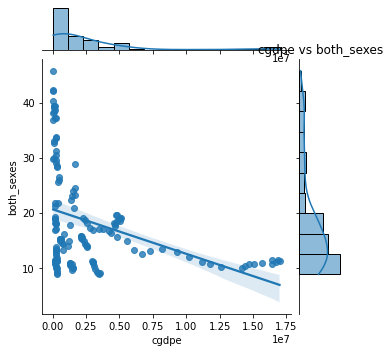

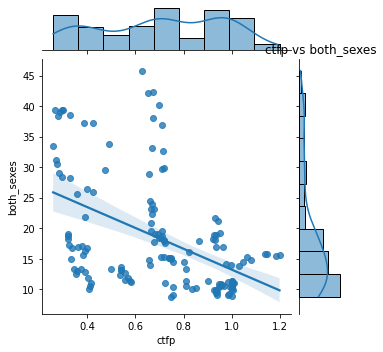

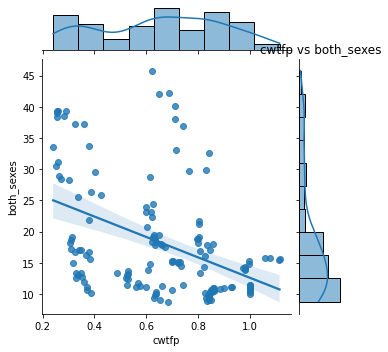

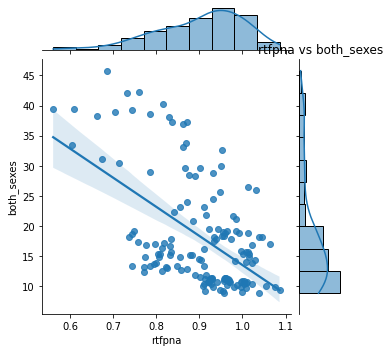

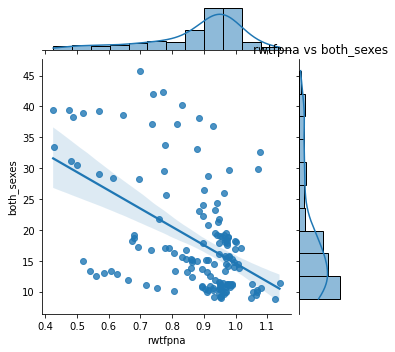

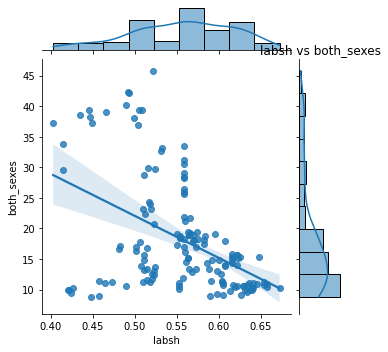

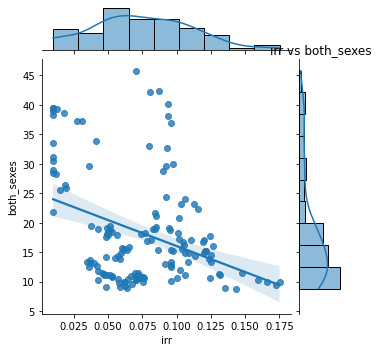

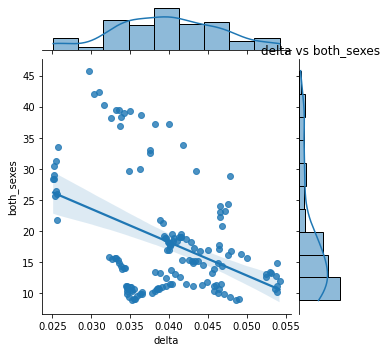

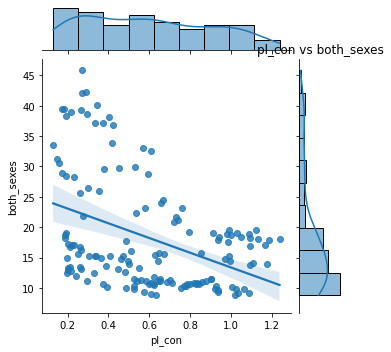

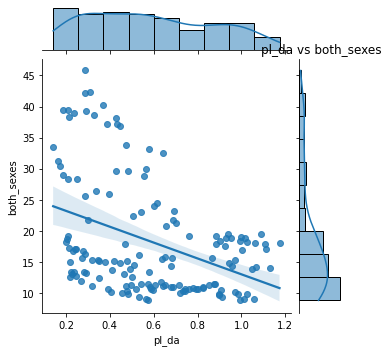

In [107]:
explore_jointplots(train, 'both_sexes', quant_dogs1)

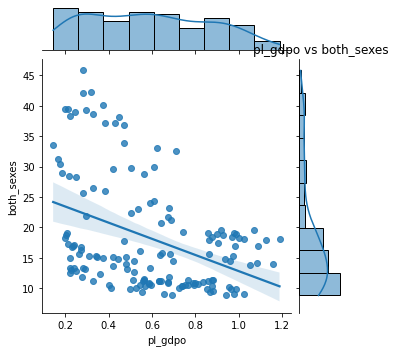

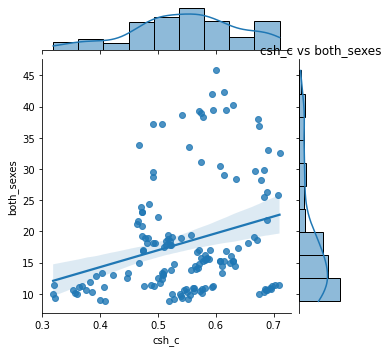

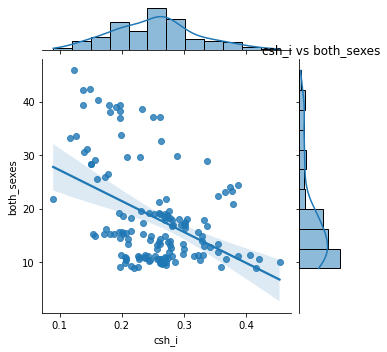

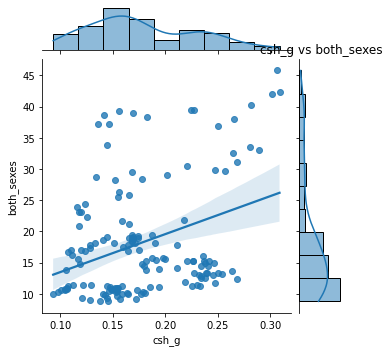

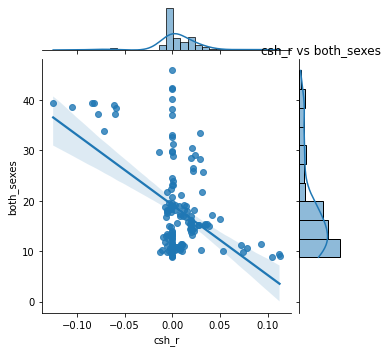

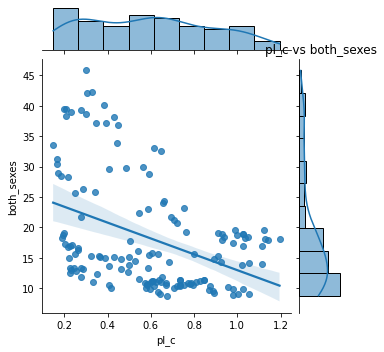

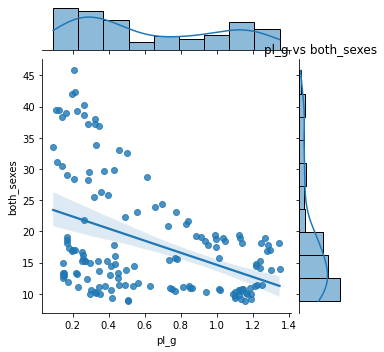

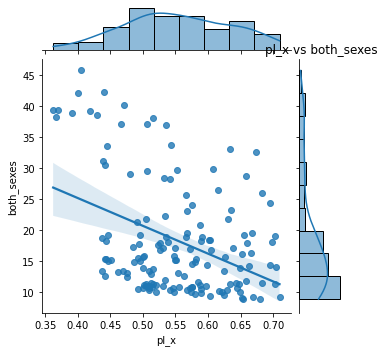

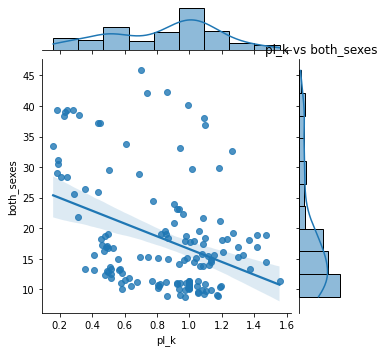

In [108]:
explore_jointplots(train, 'both_sexes', quant_dogs2)